# Sklearn Ridge Regression

In [5]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import KFold, cross_val_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [6]:
# Directory where files are stored
DIRECTORY = 'hopkins_export/'  # Adjust this path as needed

In [7]:
# Set parameters for analysis
np.random.seed(23)
LAMBDAs = [0.001, 0.01, 0.1, 1, 10]  # Regularization strengths for Ridge
kf_splits = 5  # Number of K-Folds

# Initialize a dictionary to store the mean R^2 scores for each lambda across all subjects
all_subject_mean_r2_scores = {LAMBDA: [] for LAMBDA in LAMBDAs}

In [8]:
subject_files = [f for f in os.listdir(DIRECTORY) if f.endswith('.csv')]
for subject_file in subject_files:
    # Load each subject dataset
    subject_data = pd.read_csv(os.path.join(DIRECTORY, subject_file))
    
    # Dynamically determine sample sizes for the current subject based on its length
    sample_sizes = np.geomspace(1000, len(subject_data), num=3, dtype=int)

    # Calculate sample fractions for each subject
    sample_fractions = sample_sizes / len(subject_data)  # Adjusted per subject
    
    # Dictionary to hold mean R^2 scores for each lambda for the current subject
    mean_r2_scores = {LAMBDA: [] for LAMBDA in LAMBDAs}
    
    # Loop through each regularization strength (lambda)
    for LAMBDA in LAMBDAs:
        LAMBDA_r2_scores = []  # List to collect R^2 scores for different sample sizes
        for sample_size in sample_sizes:
            # Randomly select a subset of the data for the given sample size
            np.random.seed(23)
            sample_indices = np.random.choice(len(subject_data), sample_size, replace=False)
            X_sample = subject_data.drop(columns=["expected_time", "flip_time", "stim_pos", "user_pos", "lambda_val", "change_rate_x"]).iloc[sample_indices].values
            y_pos_dif = (subject_data["user_pos"].iloc[sample_indices] - subject_data["stim_pos"].iloc[sample_indices]).values

            # Initialize Ridge model with the specified LAMBDA (alpha)
            ridge_model = Ridge(alpha=LAMBDA)
            
            # Perform K-Fold cross-validation
            kf = KFold(n_splits=kf_splits, shuffle=True, random_state=23)
            kf_r2_scores = [ridge_model.fit(X_sample[train_idx], y_pos_dif[train_idx]).score(X_sample[test_idx], y_pos_dif[test_idx])
                            for train_idx, test_idx in kf.split(X_sample)]

            # Calculate the mean R^2 score for the current sample size and lambda
            LAMBDA_r2_scores.append(np.mean(kf_r2_scores))
        
        # Store mean R^2 scores for each lambda across all sample sizes for the current subject
        mean_r2_scores[LAMBDA] = LAMBDA_r2_scores

    # Append each subject's mean R^2 scores
    for LAMBDA in LAMBDAs:
        all_subject_mean_r2_scores[LAMBDA].append(mean_r2_scores[LAMBDA])

c:\Users\ishad\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=9.40657e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\ishad\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=9.55825e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\ishad\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=9.22247e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\ishad\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=9.20839e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\ishad\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:20

In [9]:
# Aggregate results by averaging across all subjects
average_r2_scores = {LAMBDA: np.mean(all_subject_mean_r2_scores[LAMBDA], axis=0) for LAMBDA in LAMBDAs}

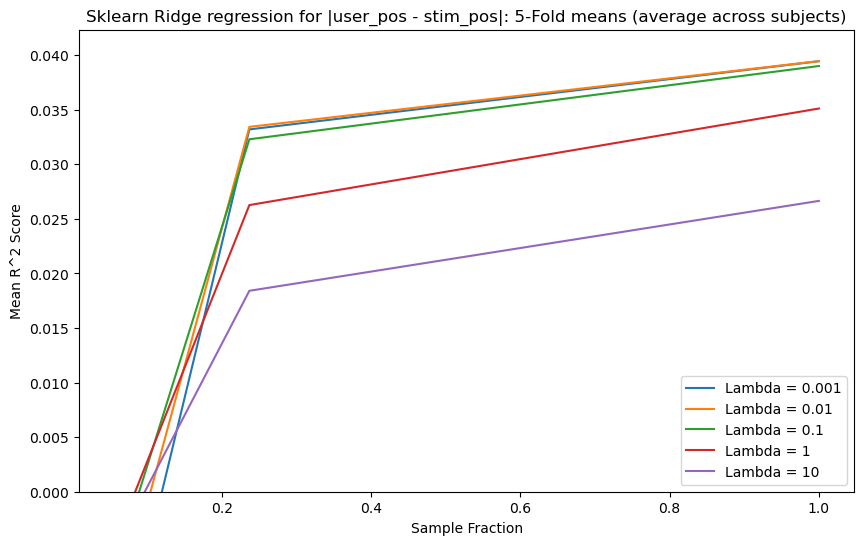

In [13]:
# Plot the results
plt.figure(figsize=(10, 6))
for LAMBDA, avg_r2_scores in average_r2_scores.items():
    plt.plot(sample_fractions, avg_r2_scores, label=f'Lambda = {LAMBDA}')
plt.xlabel('Sample Fraction')
plt.ylabel('Mean R^2 Score')
plt.title('Sklearn Ridge regression for |user_pos - stim_pos|: 5-Fold means (average across subjects)')
plt.ylim(0,None)
plt.legend()
plt.show()

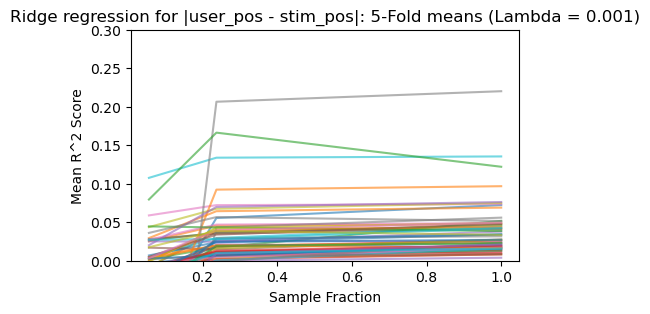

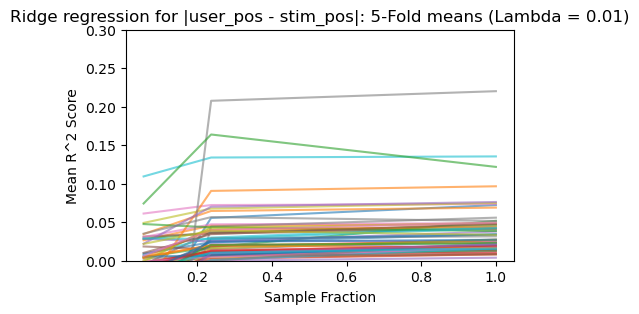

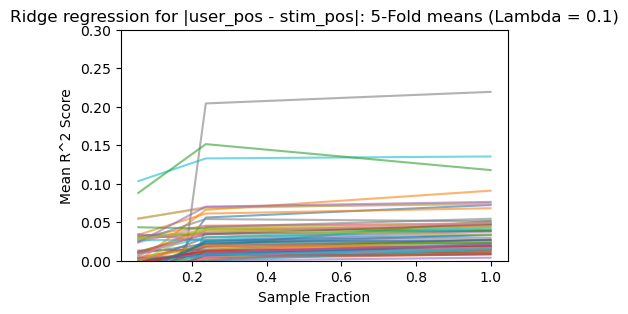

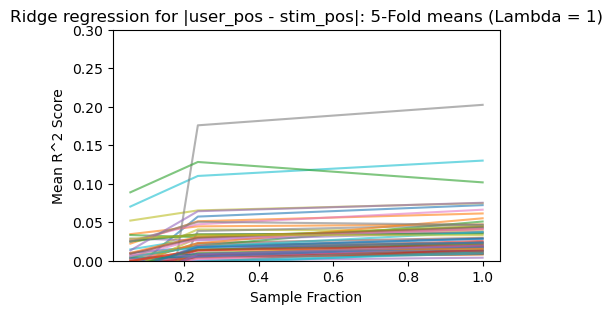

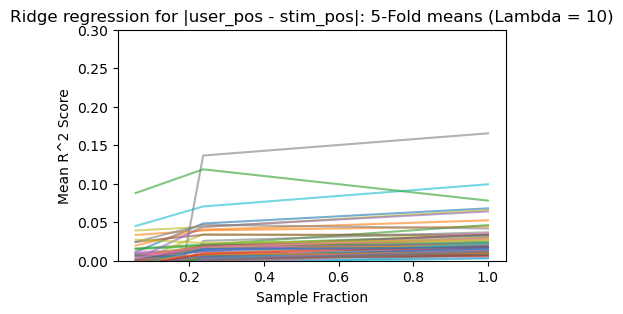

In [12]:
# Plot individual lines for each subject, with one plot per lambda
for LAMBDA in LAMBDAs:
    plt.figure(figsize=(5, 3))
    plt.title(f'Ridge regression for |user_pos - stim_pos|: 5-Fold means (Lambda = {LAMBDA})')
    plt.xlabel('Sample Fraction')
    plt.ylabel('Mean R^2 Score')
    plt.ylim(0,0.3)
    
    # Plot R^2 scores for each subject for the current lambda
    for subject_r2_scores in all_subject_mean_r2_scores[LAMBDA]:
        plt.plot(sample_fractions, subject_r2_scores, linestyle='-', alpha=0.6)
    
    #plt.legend([f'Subject {i+1}' for i in range(len(subject_files))], loc='best', fontsize='small', ncol=2, frameon=False)
    plt.show()
